# Import the libraries

In [204]:
import numpy as np
import pandas as pd

import os
for dirname,_, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
sns.set(style = "whitegrid")

In [208]:
# ignore warnings 

import warnings 
warnings.filterwarnings('ignore')

# Import Dataset

In [213]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\21st - Seaborn, Eda Practicle\21st - Seaborn, Eda Practicle\EDA- HEALTHCARE DOMAIN\heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Explaratory Data Analysis 

# check the shape of the dataset

In [9]:
df.head()   # preview the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df.shape   # print the shape of dataset

(303, 14)

In [12]:
df.info()    # summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.dtypes  # check the datatypes of columns

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
df.describe()   # check the statistical properties of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.columns  # view the column names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Univariate Analysis

In [17]:
df['target'].nunique()  # check the number of unique values in target variable 

2

In [18]:
df['target'].unique()  # view the unique values in target variable

array([1, 0], dtype=int64)

In [19]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [83]:
len('target')

6

In [85]:
df['sex'].nunique()

2

In [87]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [89]:
df['thalach'].nunique()

91

In [91]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

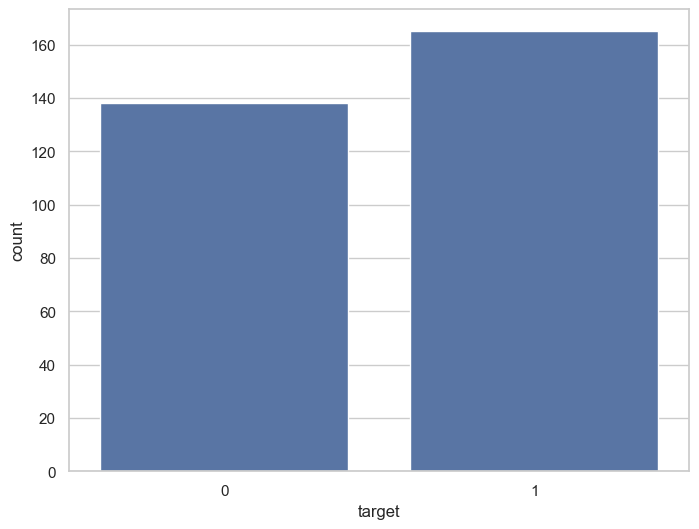

In [20]:
f, ax = plt.subplots(figsize = (8,6))    # visualize the frequency distribution of target variable
ax = sns.countplot(x = 'target', data = df)
plt.show()

In [21]:
df.groupby('sex')['target'].value_counts()    # frequency distribution of target variable w.r.t sex

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

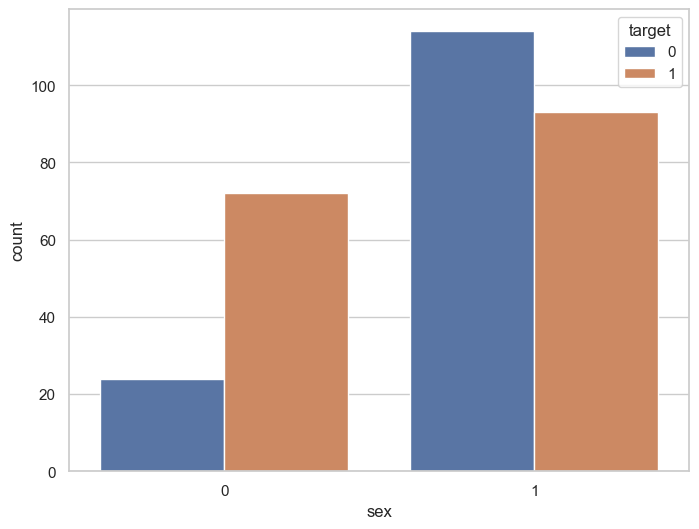

In [22]:
 f , ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = 'sex', hue = 'target',data = df)
plt.show()

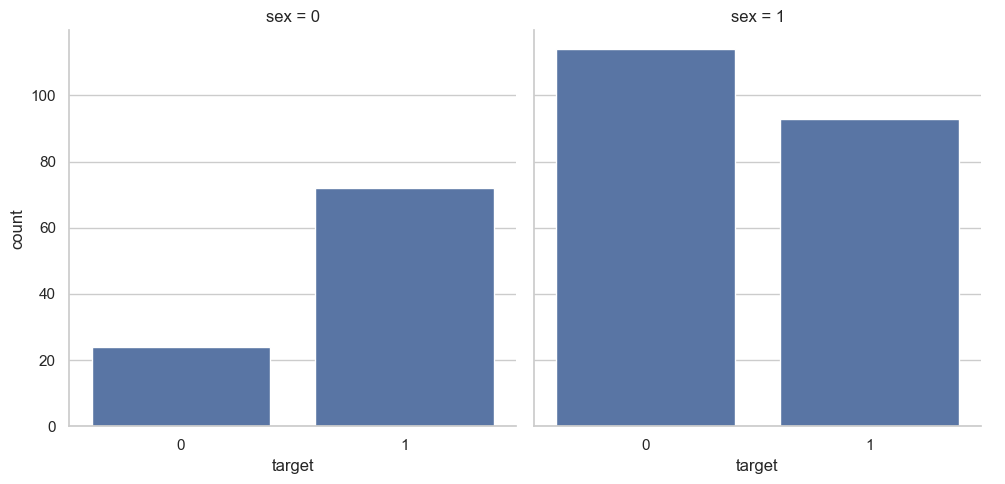

In [97]:
ax = sns.catplot(x = 'target', col = 'sex', data = df,kind = 'count', height = 5, aspect = 1)
plt.show()

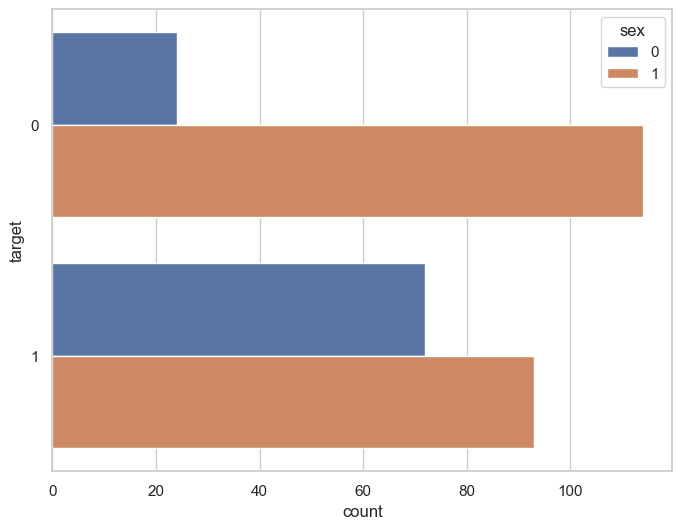

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="target", hue="sex", data=df)
plt.show()

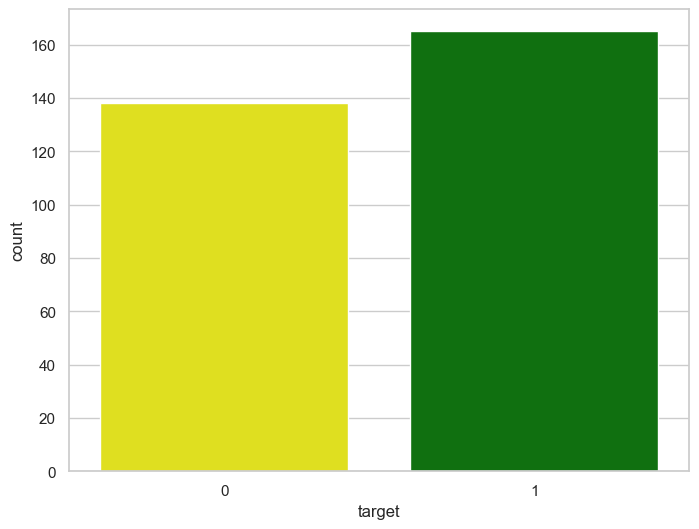

In [93]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, palette = ['yellow','green'])
plt.show()

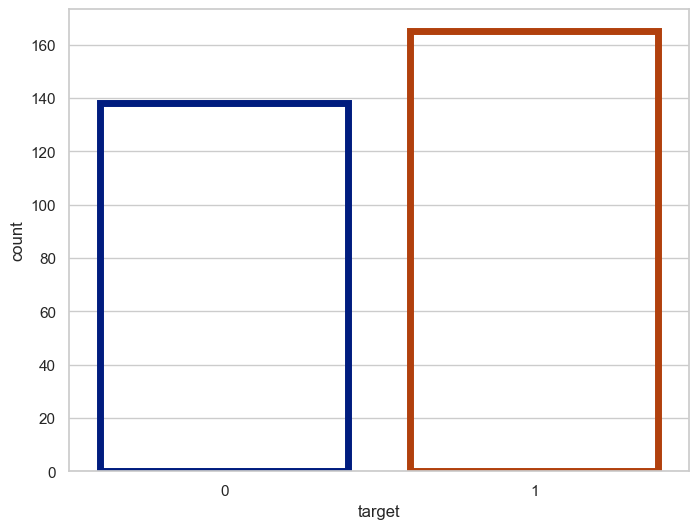

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df,facecolor=(0,0,0,0), linewidth = 5, edgecolor = sns.color_palette('dark',3))
plt.show()

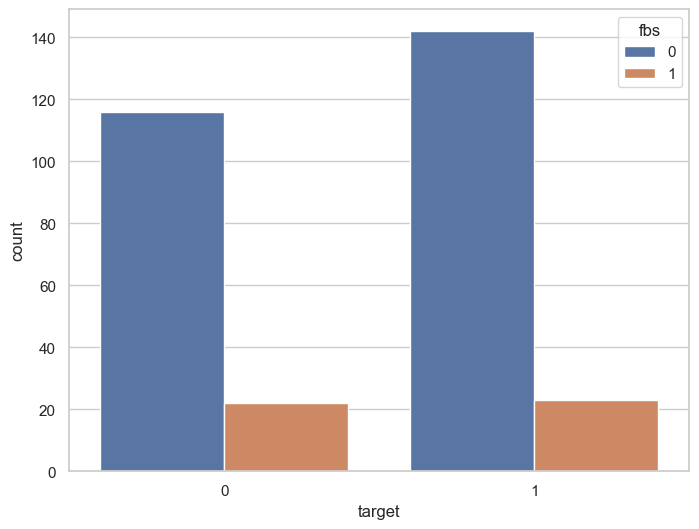

In [27]:
f, ax = plt.subplots(figsize=(8, 6))              # we can visualize the target value distribution w.r.t fbs(fast blood sugar)
ax = sns.countplot(x="target", hue="fbs", data=df)  
plt.show()

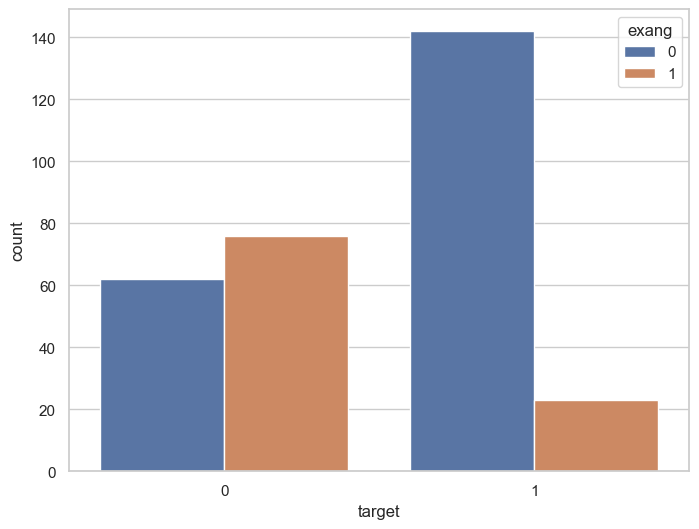

In [28]:
f, ax = plt.subplots(figsize=(8, 6))              # we can visualize the target value distribution w.r.t exang(excerise induced agina)
ax = sns.countplot(x="target", hue="exang", data=df)  
plt.show()

# BiVariate Analysis

In [111]:
correlation = df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [31]:
correlation['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

# Analysis of target and cp variable

In [33]:
df['cp'].nunique()

4

In [34]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [99]:
len('cp')

2

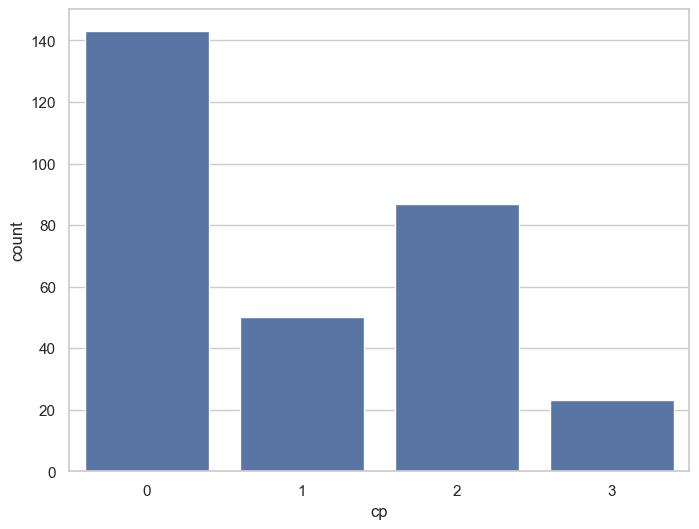

In [35]:
f, ax = plt.subplots(figsize=(8, 6))      # visualize the frequency of cp variable 
ax = sns.countplot(x="cp", data=df)  
plt.show()

In [36]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

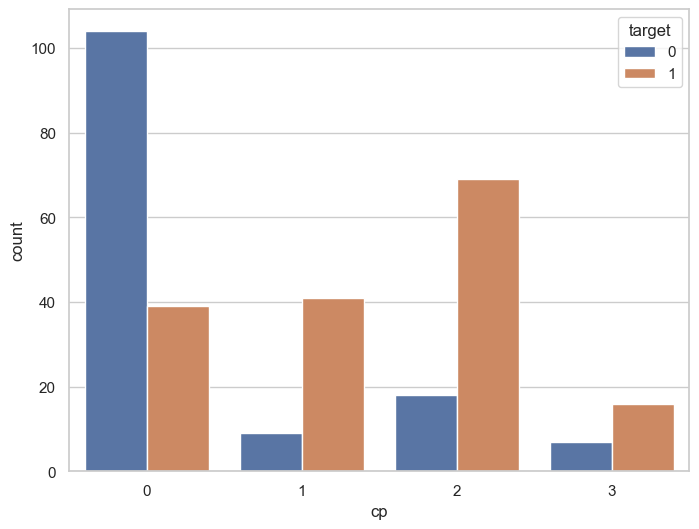

In [37]:
f, ax = plt.subplots(figsize=(8, 6))              # we can visualize the target value distribution w.r.t fbs
ax = sns.countplot(x="cp", hue="target", data=df)  
plt.show()

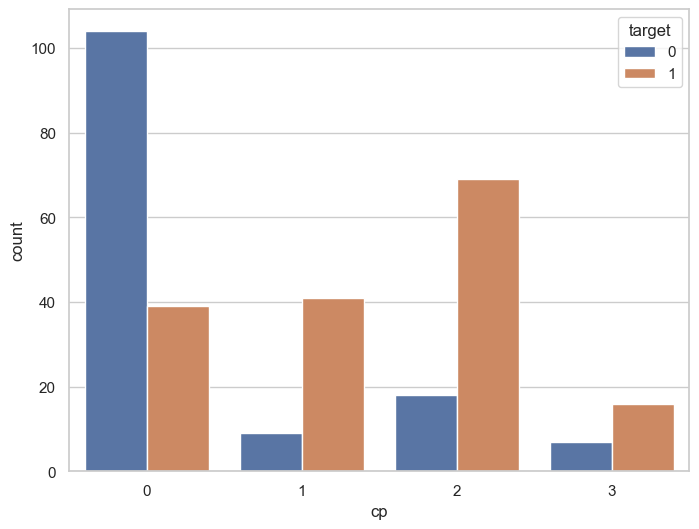

In [119]:
f, ax = plt.subplots(figsize=(8, 6))              
ax = sns.countplot(x="cp", hue="target", data=df)  
plt.show()

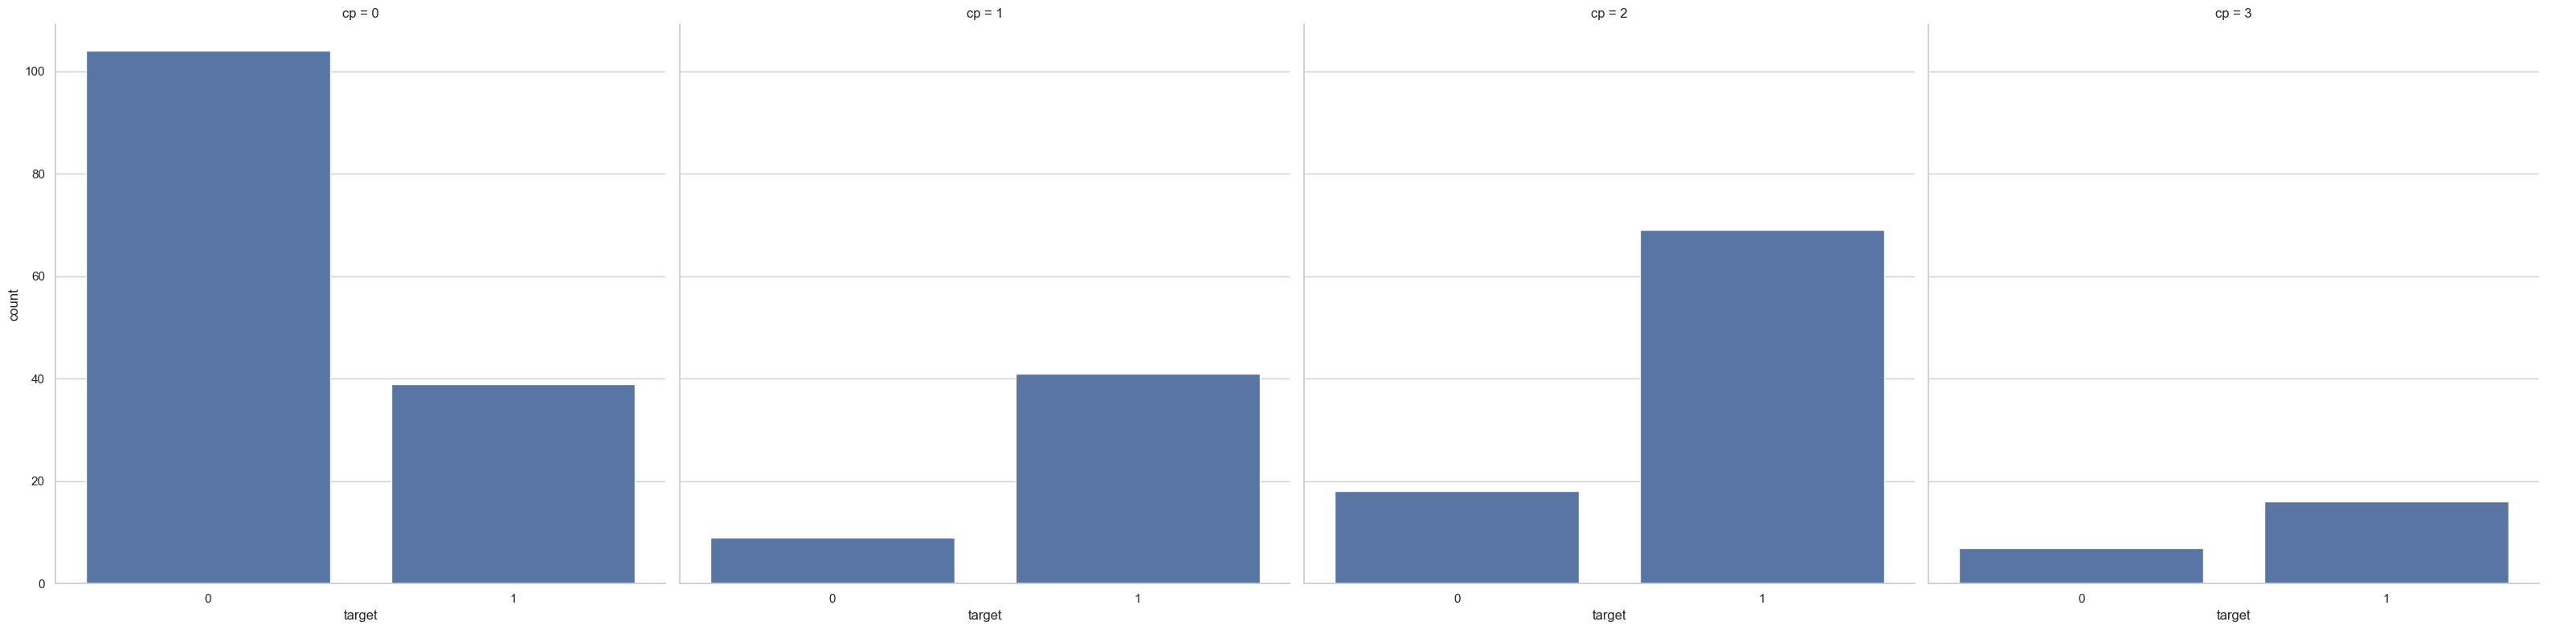

In [38]:
ax = sns.catplot(x = 'target', col = 'cp', data = df, kind = 'count', height = 8, aspect = 1)
plt.show()

# Analysis of target and thalach variable

In [40]:
df['thalach'].nunique()

91

In [101]:
len('thalach')

7

In [41]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

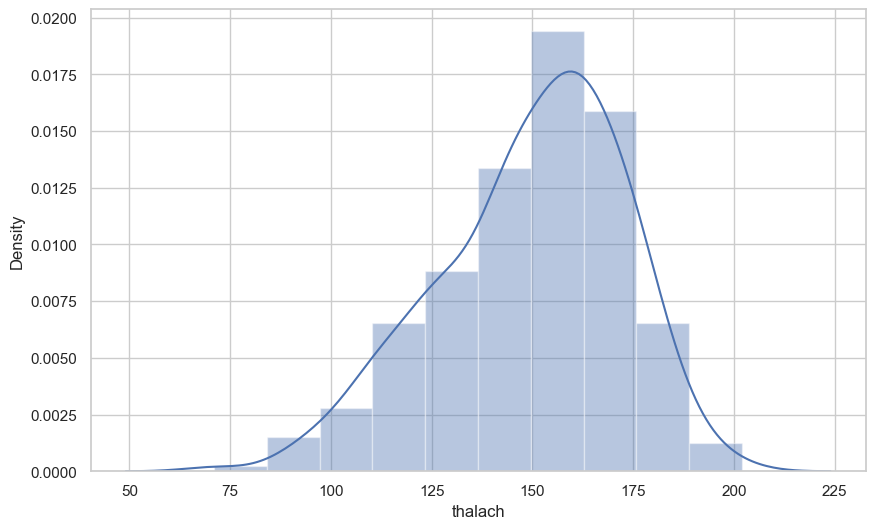

In [42]:
f,ax = plt.subplots(figsize = (10,6))
x = df['thalach']
ax = sns.distplot(x, bins = 10)
plt.show()

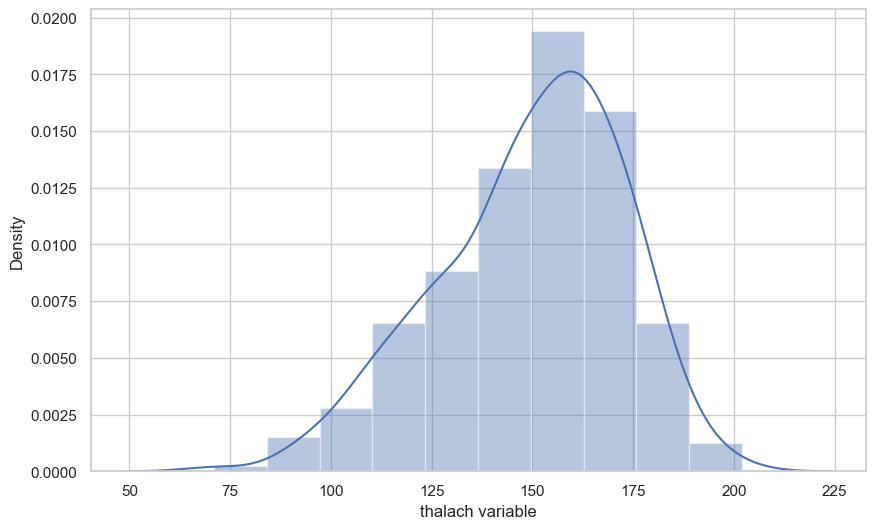

In [43]:
f,ax = plt.subplots(figsize = (10,6))
x = df['thalach']
x = pd.Series(x, name = 'thalach variable')
ax = sns.distplot(x, bins = 10)
plt.show()

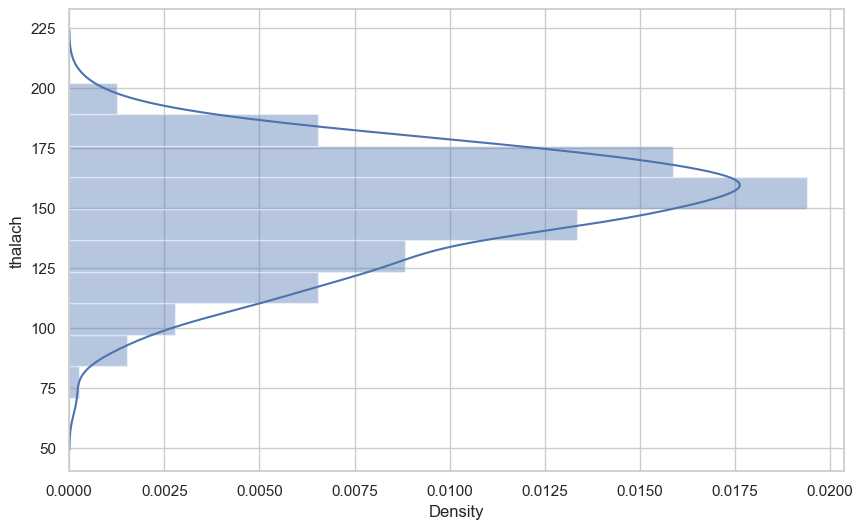

In [44]:
f,ax = plt.subplots(figsize = (10,6))
x = df['thalach']
ax = sns.distplot(x, bins = 10, vertical = True)
plt.show()

# Seaborn Kernel Density Estimation (KDE)

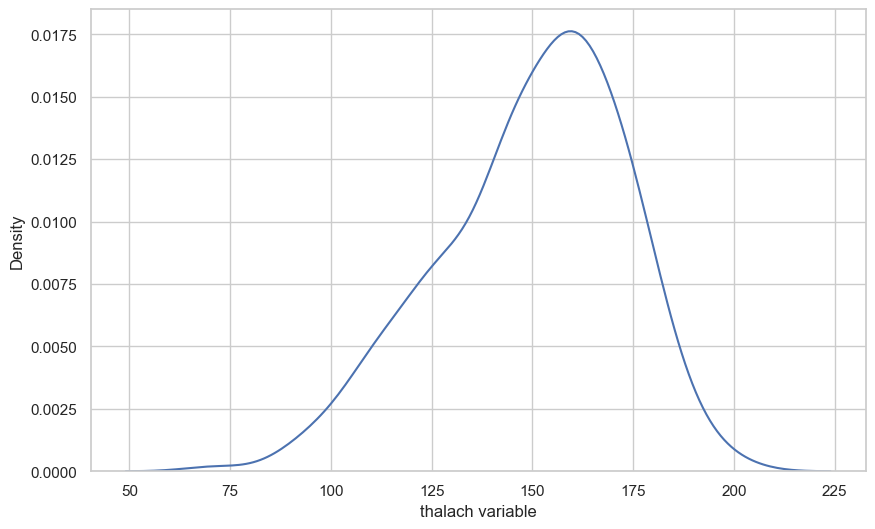

In [109]:
f,ax = plt.subplots(figsize = (10,6))
x = df['thalach']
x = pd.Series(x, name = 'thalach variable')
ax = sns.kdeplot(x)
plt.show()

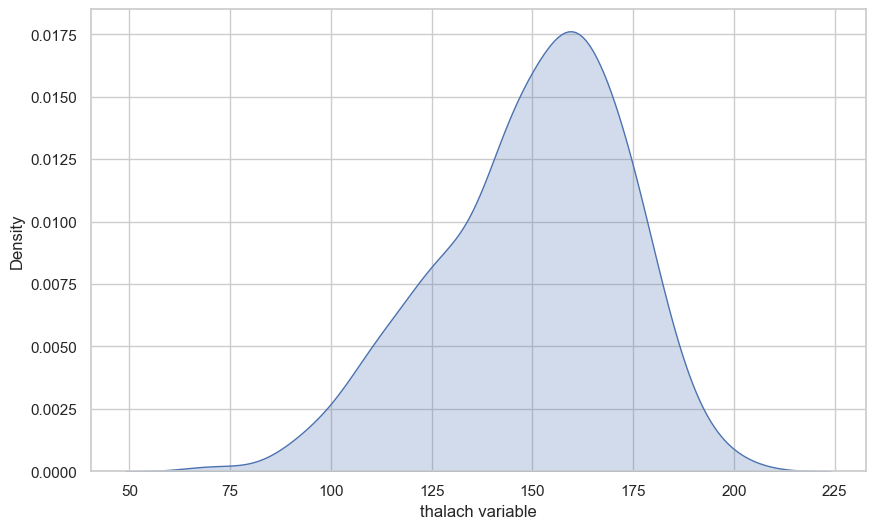

In [123]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='b')
plt.show()

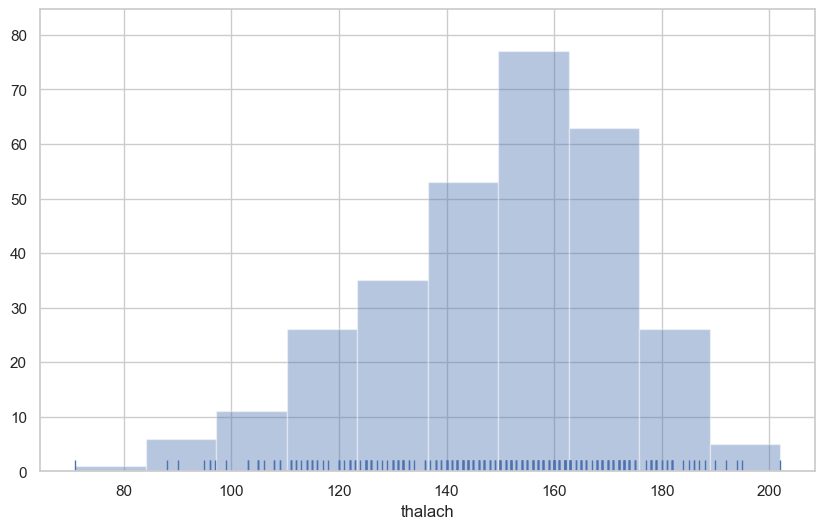

In [125]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

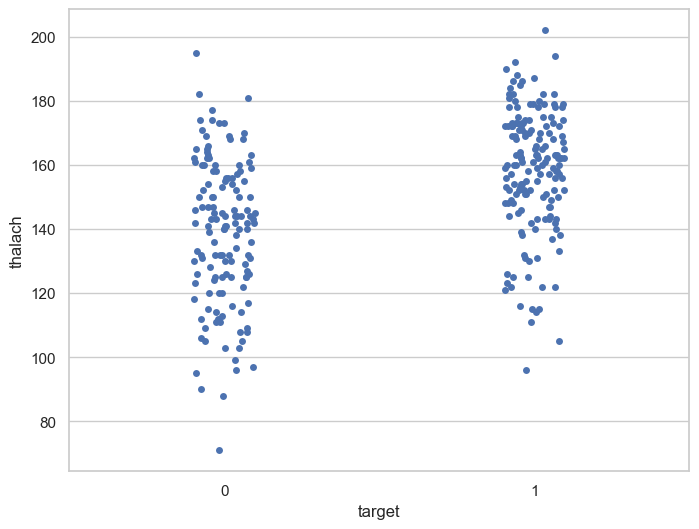

In [127]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

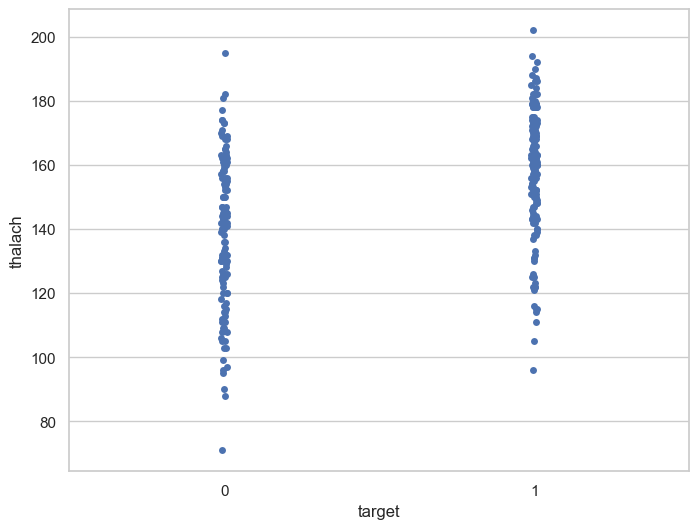

In [129]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df,jitter = 0.01)
plt.show()

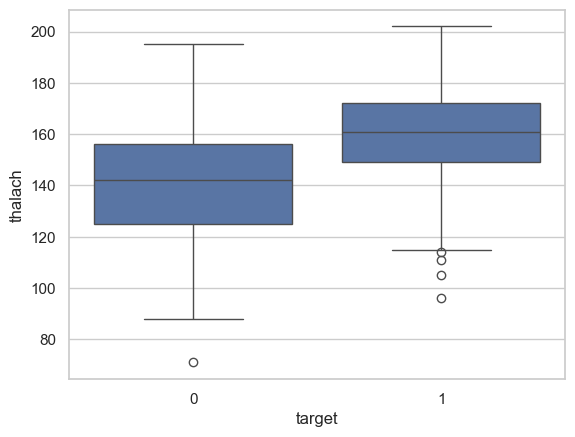

In [133]:
#f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

# Heat Map

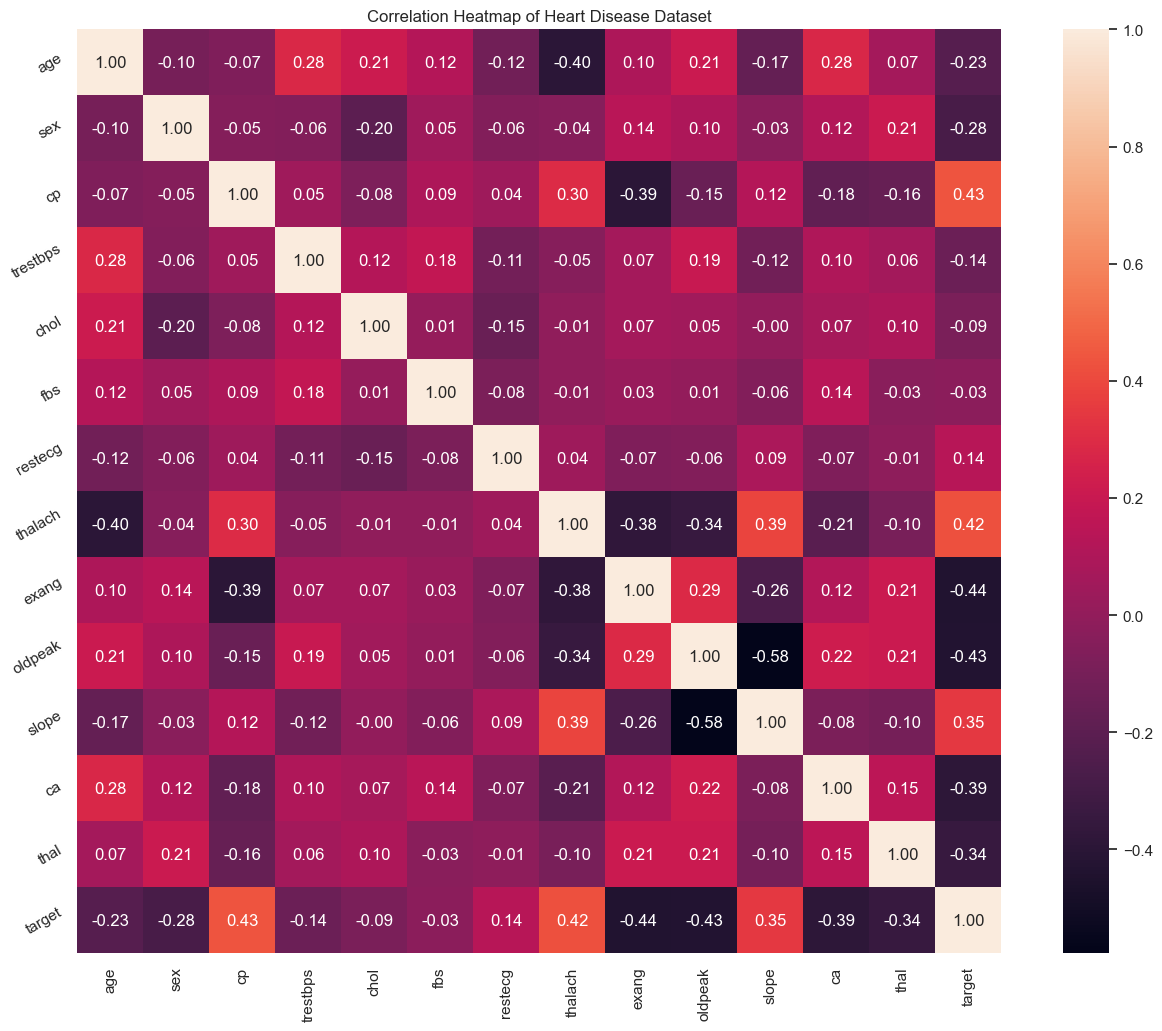

In [140]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# Pair Plot

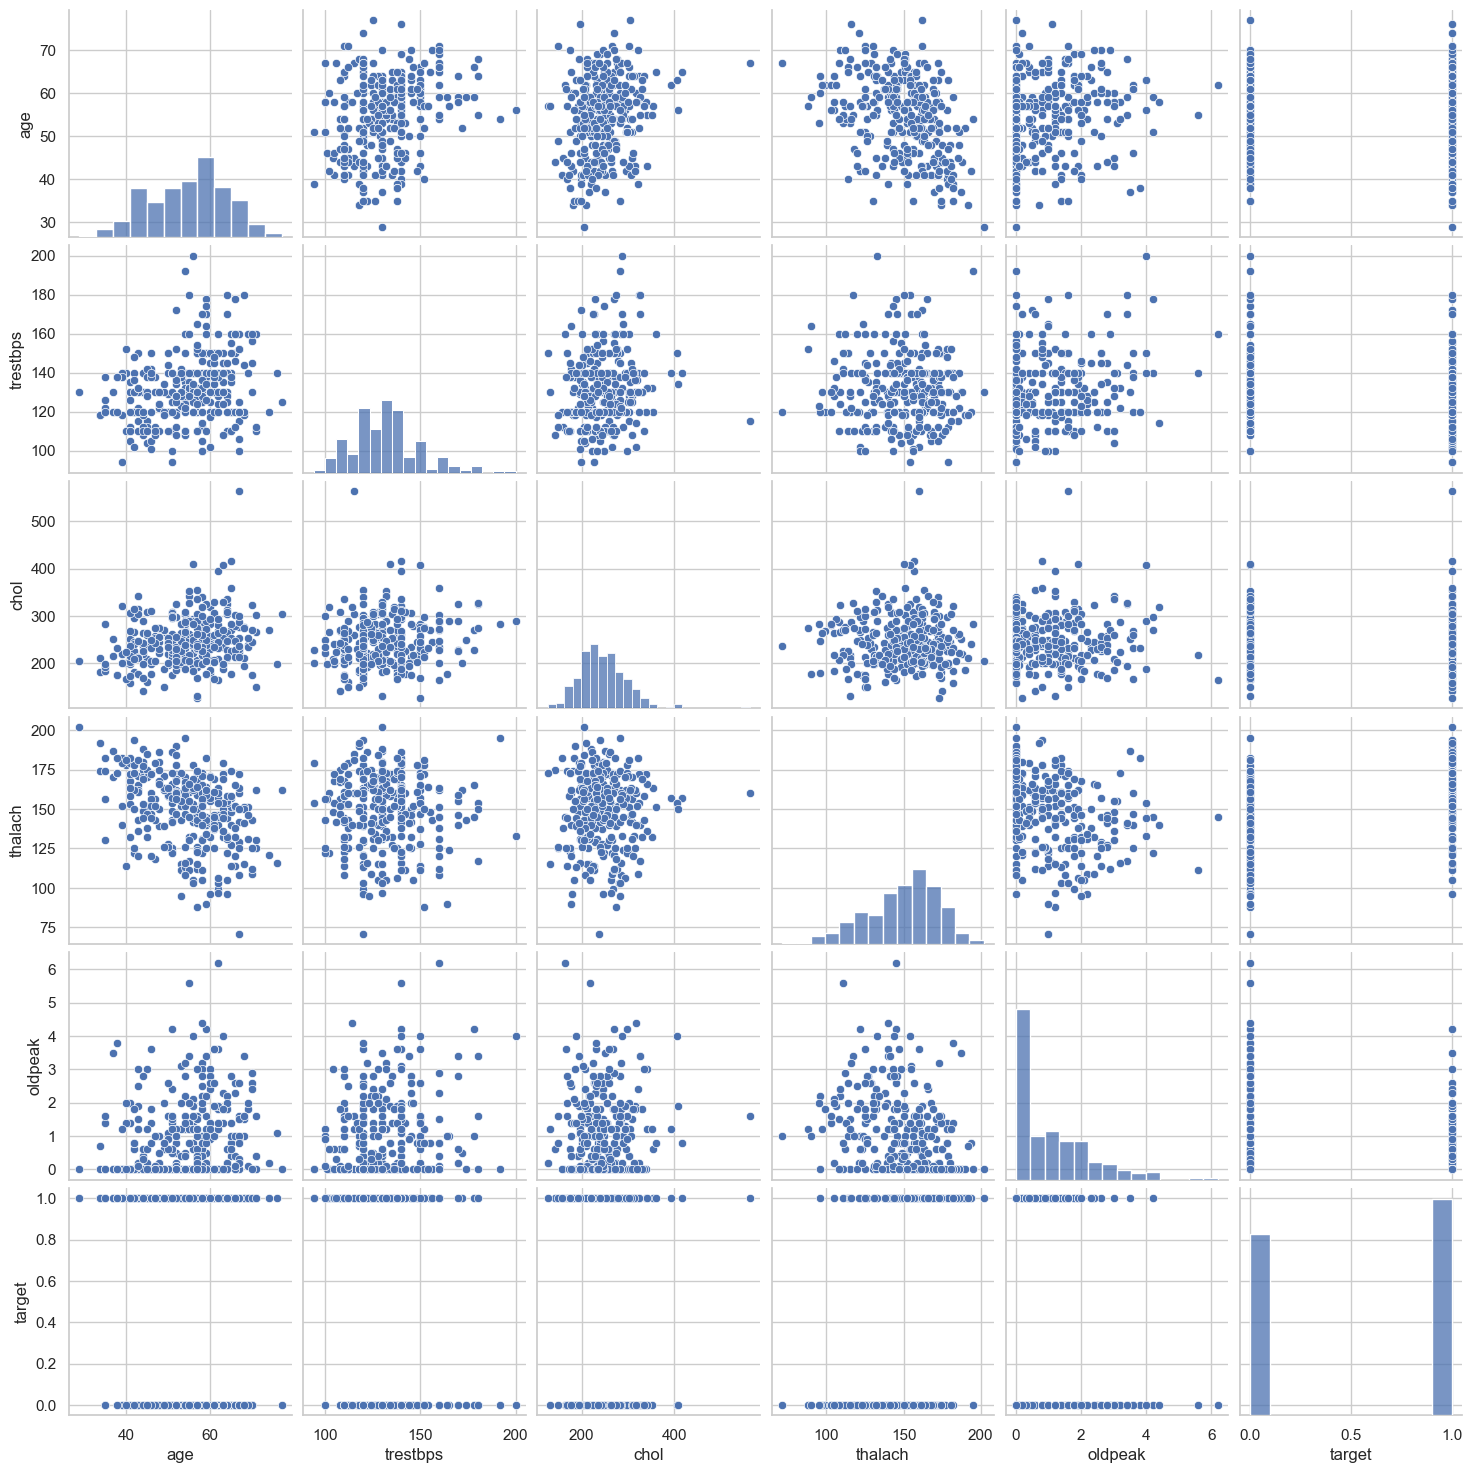

In [143]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

# Analysis of Age and other variable

In [146]:
df['age'].nunique()

41

In [148]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [150]:
len(df['age'])

303

In [152]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

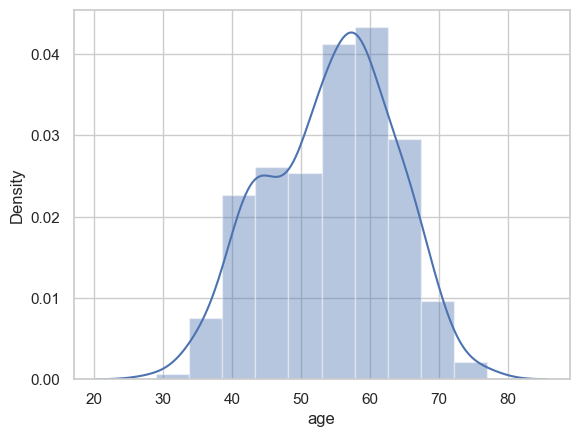

In [154]:
sns.distplot(df['age'],bins = 10)
plt.show()

# Analysis age and target variable

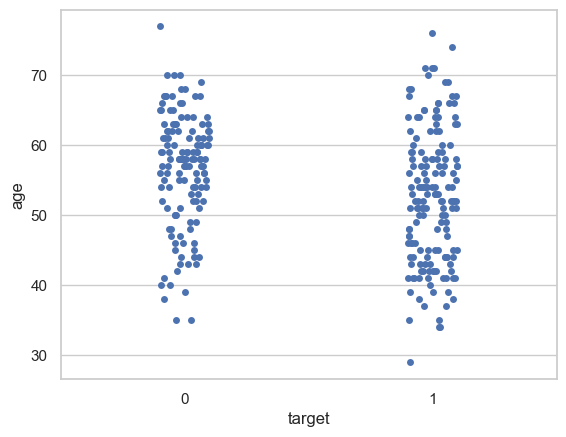

In [157]:
sns.stripplot(x = 'target', y = 'age', data = df)
plt.show()

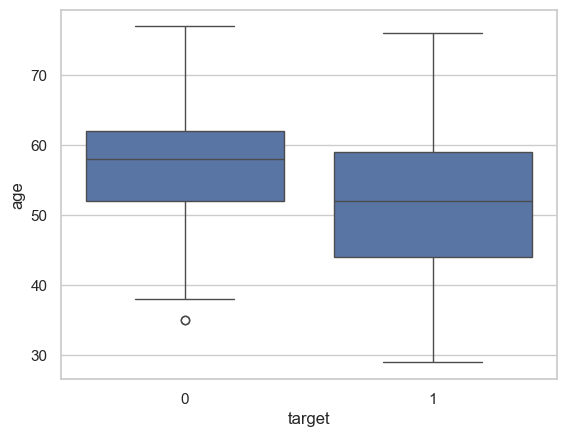

In [159]:

sns.boxplot(x = 'target', y = 'age', data = df)
plt.show()

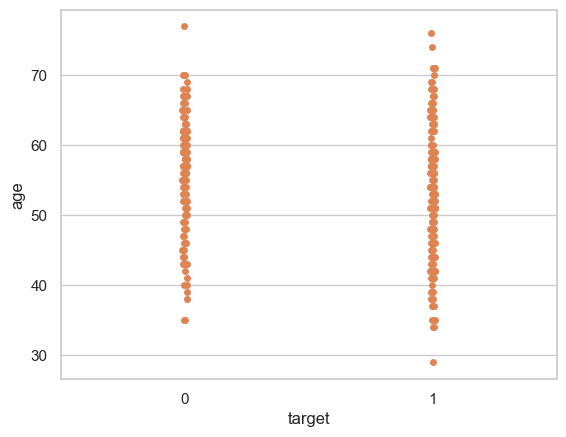

In [163]:
sns.stripplot(x = 'target', y = 'age', data = df,jitter = 0.01)
plt.show()

# Analyse the age and trestbps variable

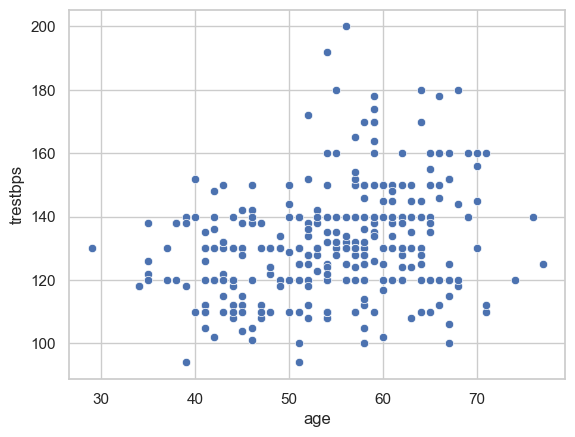

In [166]:
sns.scatterplot(x = 'age',y = 'trestbps', data = df)
plt.show()

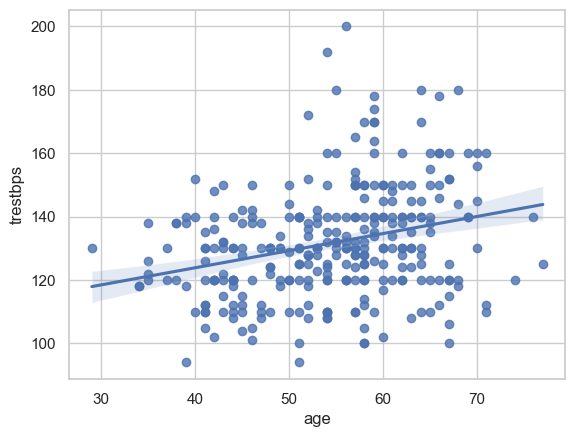

In [168]:
sns.regplot(x = 'age', y = 'trestbps', data = df)
plt.show()

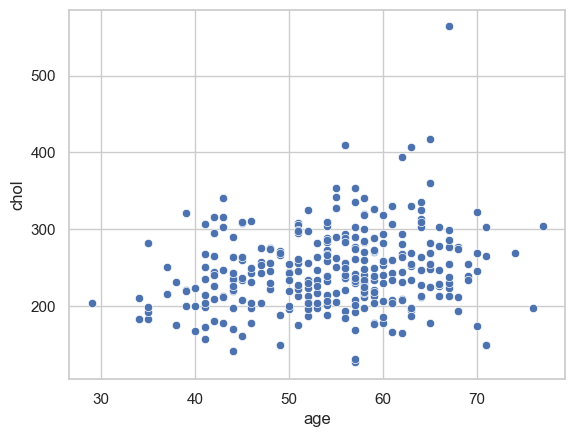

In [170]:
sns.scatterplot(x = 'age', y = 'chol', data = df)
plt.show()

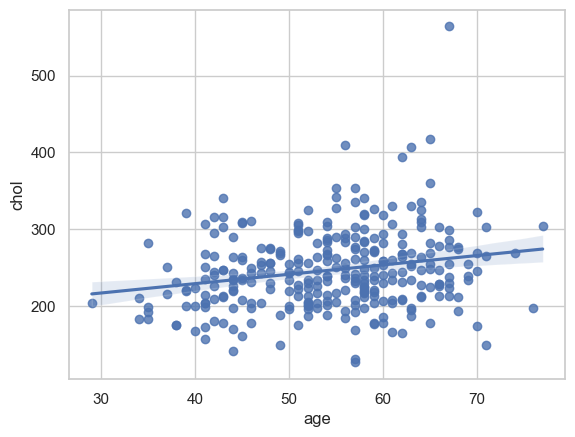

In [172]:
sns.regplot(x = 'age', y = 'chol', data = df)
plt.show()

# Analyse the chol and thalach variable

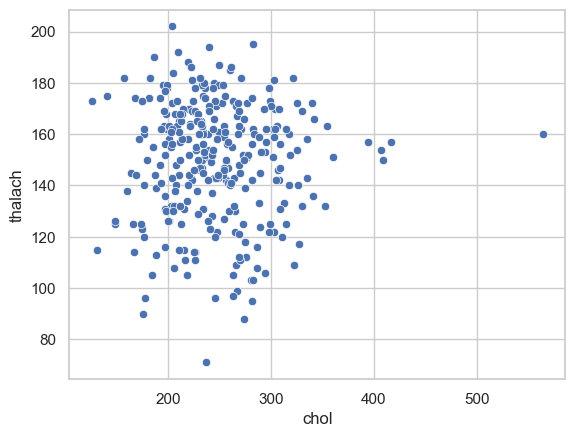

In [175]:
sns.scatterplot(x = 'chol', y = 'thalach', data = df)
plt.show()

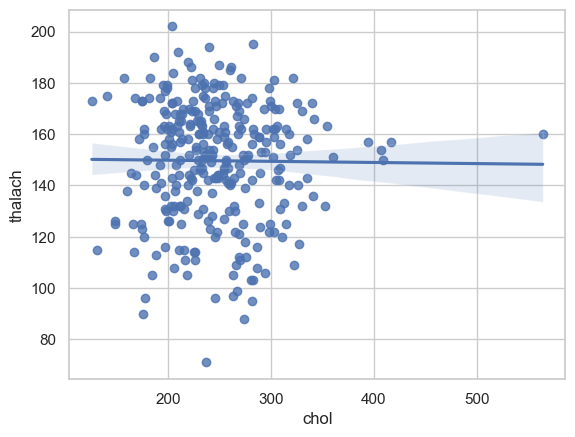

In [177]:
sns.regplot(x = 'chol', y = 'thalach', data = df)
plt.show()

In [179]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [181]:
# Check with the assert statement
assert pd.notnull(df).all().all()

In [183]:
assert (df>=0).all().all()

# Outlier detection

In [186]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

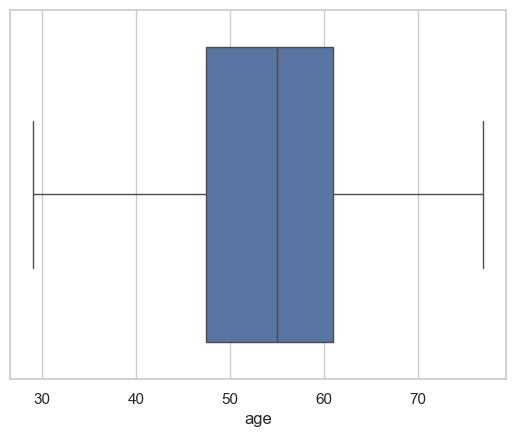

In [188]:
sns.boxplot(x=df['age'])
plt.show()

In [190]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

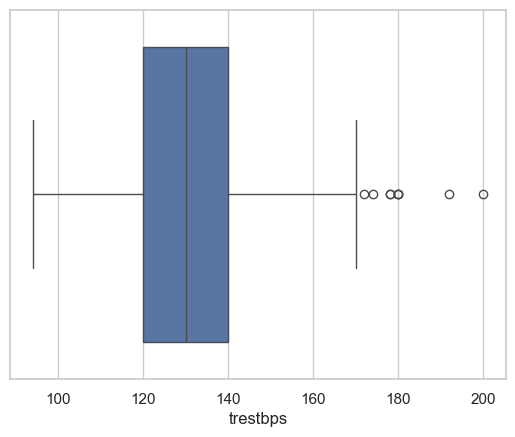

In [192]:
sns.boxplot(x=df['trestbps'])
plt.show()

In [194]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

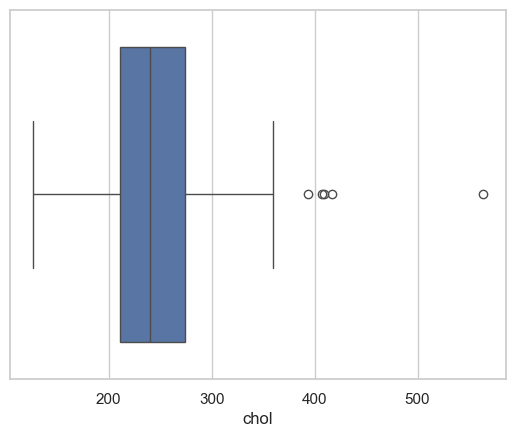

In [196]:
sns.boxplot(x = df['chol'])
plt.show()

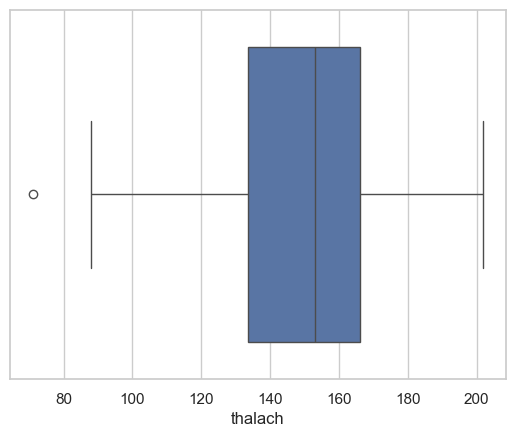

In [198]:
sns.boxplot(x = df['thalach'])
plt.show()

In [200]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

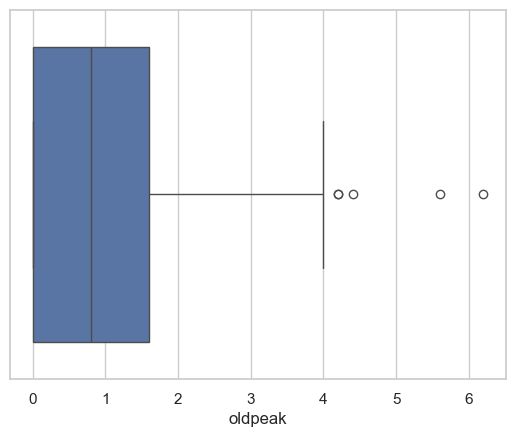

In [202]:
sns.boxplot(x=df['oldpeak'])
plt.show()